# Question 1

## How do weather conditions, like temperature and rainfall, influence farm productivity and pesticide use?

Understanding the role of climate factors in the link between farm productivity and pesticide use is crucial for developing sustainable agricultural practices that are resilient to changing weather conditions. This question seeks to explore the impact of temperature and rainfall on the effectiveness of various farming methods and their reliance on pesticides.

In [1]:
import requests
from zipfile import ZipFile
from io import BytesIO
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import geopandas as gpd
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from IPython.display import display, Markdown

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")

# Some housekeeping settings for better visualization
default_width = pd.get_option('display.width')
default_display_columns = pd.get_option('display.max_columns')
default_max_rows = pd.get_option('display.max_rows')
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 140)
pd.set_option('display.max_rows', 30)

## Load Data

In [2]:
# Read in the combined data
df = pd.read_csv('merged.csv')

## Distribution of Data Points

We examined the distribution of data points and noticed that the availability of data is not uniform across all countries. To address this inequality and achieve a fair comparison, aggregation techniques were employed. By streamlining the data in this manner, we hope to ensure that each country, despite the varying amount of data, contributes information to our study.

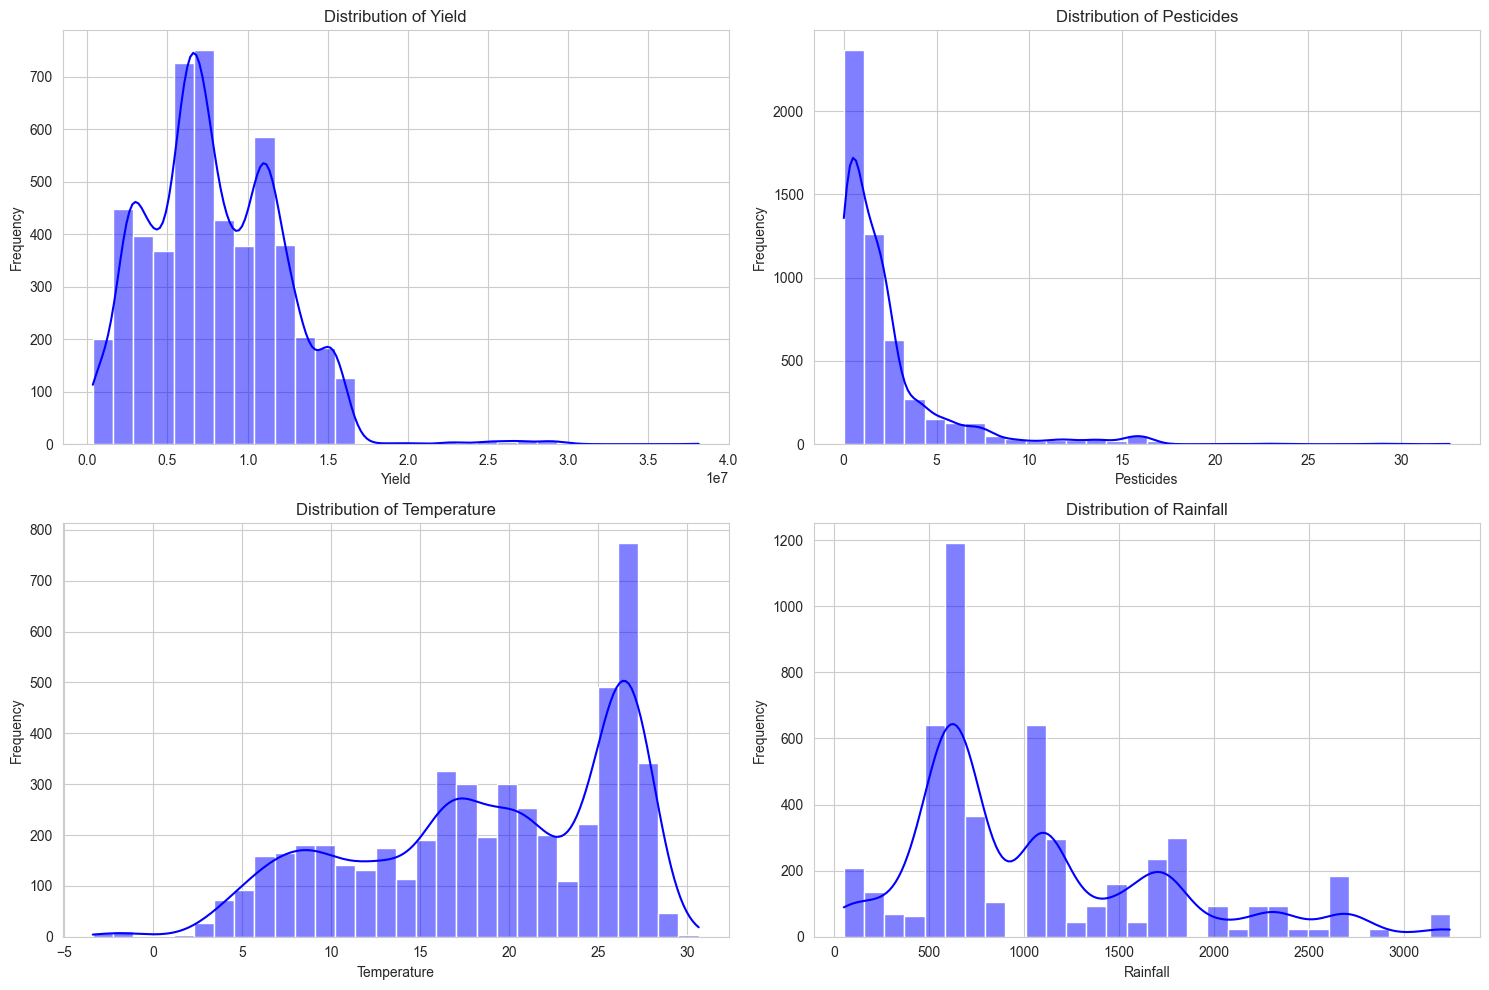

In [3]:
# Function to plot distributions
def plot_distributions(df, columns):
    """
    Plot the distributions for the given columns.
    
    Parameters:
    - df: The dataset in the form of a DataFrame.
    - columns: List of columns for which distributions should be plotted.
    
    Returns:
    - None (plots the distributions).
    """
    # Set up the aesthetics
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 10))
    
    # Loop through columns and plot distributions
    for i, column in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[column], kde=True, color='blue',bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Plot distributions for continuous variables
columns_to_plot = ['Yield', 'Pesticides', 'Temperature', 'Rainfall']
plot_distributions(df, columns_to_plot)

#### Time series Analysis

Taking a look at the various elements impacting our agriculture overtime, it's apparent that a few trends emerge.

Firstly, it's notable that the yield from our agricultural efforts appears to have a generally increasing trend over the years. This can effectively point towards consistent improvements in agricultural productivity. Alongside this development, the usage of pesticides in our agricultural processes also seems to be increasing. Although the pattern has shown several fluctuations, the general trend illustrates a steady rise.

Moreover, one remarkable observation is about the average temperature. It suggests a slight and continual upward shift. This could indicate global warming effects that are subtly impacting our environment.

Lastly, when considering rainfall patterns, they show fluctuations. However, they do not distinctly show an increasing or decreasing trend over the years. Essentially, rainfall has remained somewhat constant, making it a steady factor in our agricultural progression. 

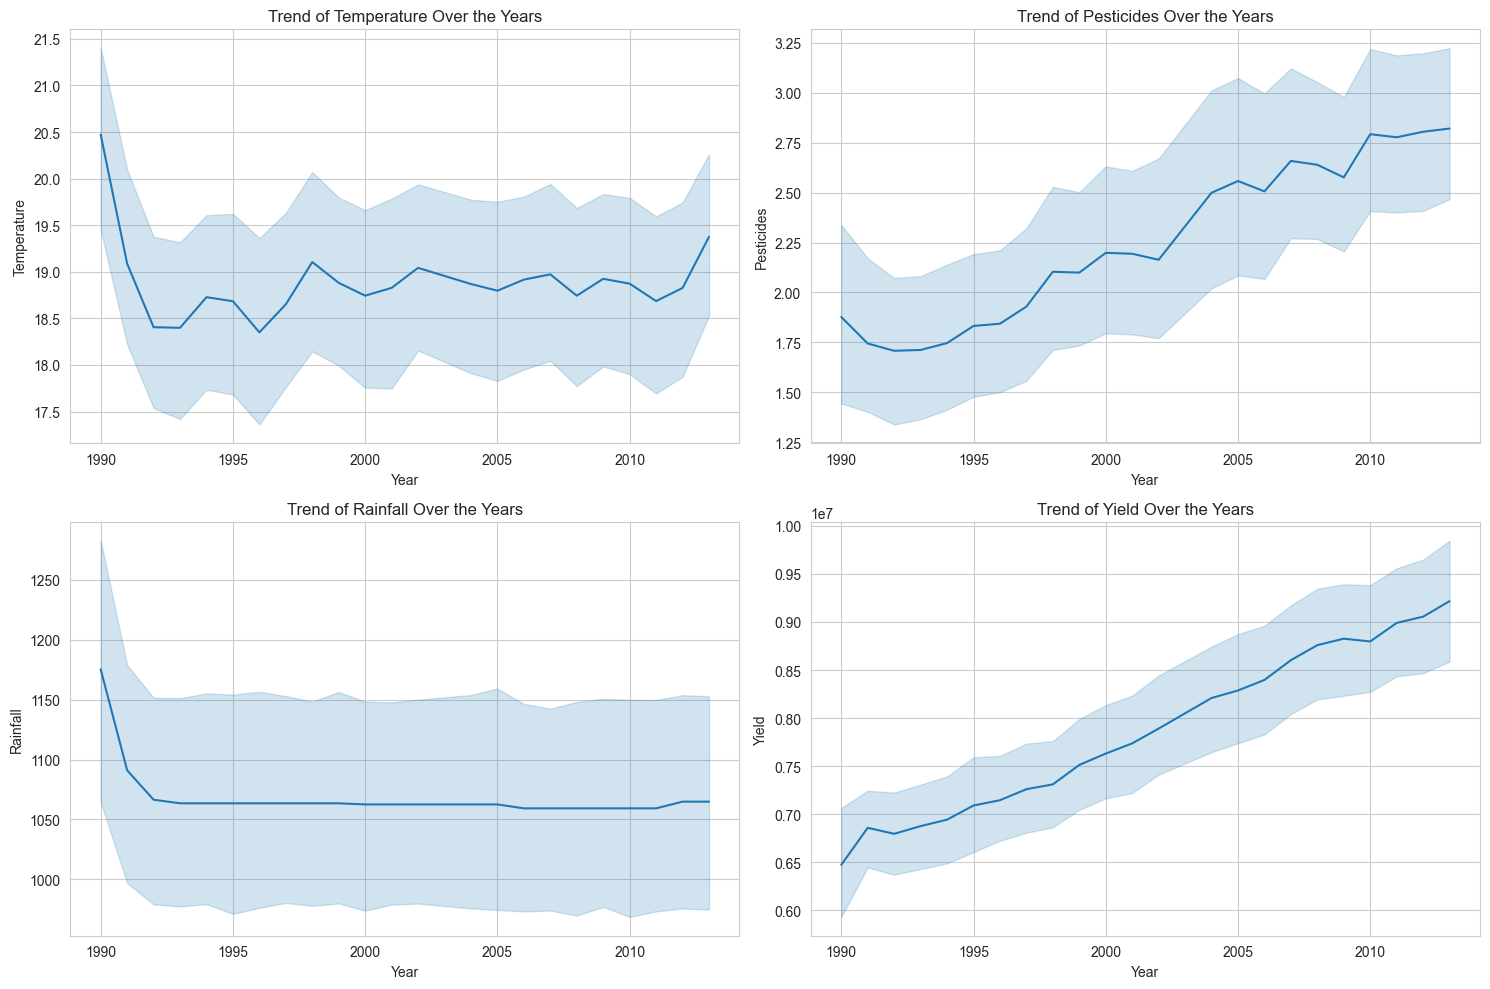

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.patch.set_alpha(0)

columns_to_plot = ['Temperature', 'Pesticides', 'Rainfall', 'Yield']

for i, column in enumerate(columns_to_plot):
    ax = axes[i//2, i%2]
    
    sns.lineplot(data=df, x='Year', y=column, ax=ax)
    ax.set_title(f'Trend of {column} Over the Years')
    ax.set_ylabel(column)
    ax.set_xlabel('Year')
    ax.set_facecolor('none')

plt.tight_layout()
plt.show()

### Correlations

The correlation matrix that we developed offers a quantifiable understanding of the relationships that exist between various factors. The values we saw in this matrix range from -1 to 1. To break this down, a value which lands close to 1 demonstrates a substantial positive correlation, while a value nearing -1 indicates a significant negative correlation. By interpreting the matrix patterns, we've reached a few observations.

Specifically looking at the `Yield` variable, we note its positive correlation with `Pesticides`. This implies that as pesticide usage increases, the yield tends to increase as well. Contrary, a marginal negative correlation is observed with `Temperature`, which is interesting. This suggests that higher temperature might hinder crop yields to some extent. Lastly, the correlation between `Yield` and `Rainfall` is weak, implying that rainfall doesn't have a significant impact on yield.

A crucial point in the matrix is that the use of pesticides seems to boost crop yields, while standalone temperature or rainfall don't seem to have a defining correlation with yield. This perhaps hints at the presence of other factors that could be influencing crop yield. While our analysis is reductive and simplistic, we do recognize that myriad of other factors may be affecting crop yields such as soil quality, pest and plant disease pressure, seed quality and genetics, fertilizer use, irrigation and water use, pollinator presence and activity, just to name a few. 

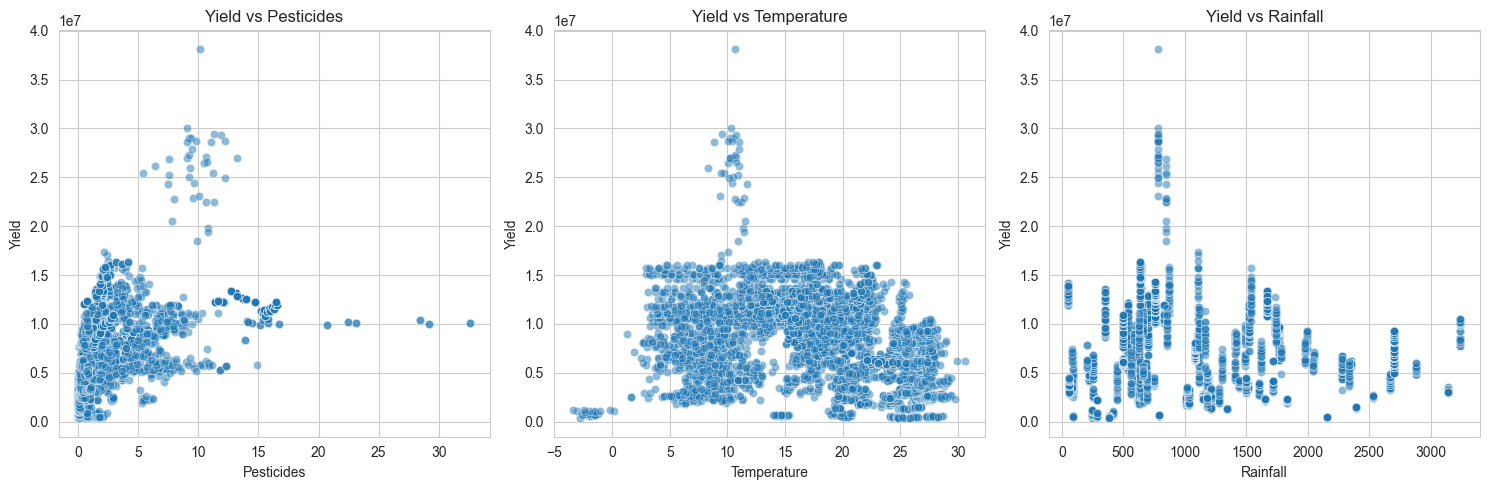

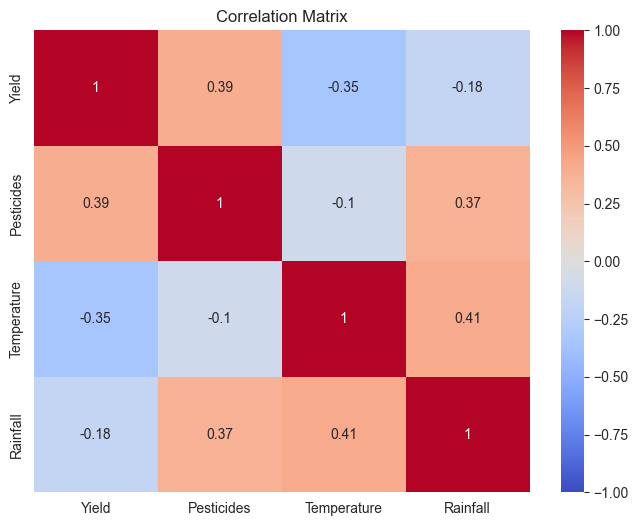

In [5]:
# Plotting correlation matrix
def relationships(df):
    """
    Plots scatter plots to analyze the relationship between variables and a correlation matrix.

    Parameters:
    - df: DataFrame containing the data.
    """
    
    # Scatter plots
    plt.figure(figsize=(15, 5))

    # Yield vs Pesticides
    plt.subplot(1, 3, 1)
    sns.scatterplot(x='Pesticides', y='Yield', data=df, alpha=0.5)
    plt.title('Yield vs Pesticides')

    # Yield vs Temperature
    plt.subplot(1, 3, 2)
    sns.scatterplot(x='Temperature', y='Yield', data=df, alpha=0.5)
    plt.title('Yield vs Temperature')

    # Yield vs Rainfall
    plt.subplot(1, 3, 3)
    sns.scatterplot(x='Rainfall', y='Yield', data=df, alpha=0.5)
    plt.title('Yield vs Rainfall')

    plt.tight_layout()
    plt.show()

    
    # Correlation matrix
    correlation_matrix = df[['Yield', 'Pesticides', 'Temperature', 'Rainfall']].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()

relationships(df)

## Top Country Analysis

#### **Yield Over Time for Top Countries**
Most countries show a general upward trend in yield over the years, indicating improvements in agricultural practices or other factors contributing to higher yields.
Some countries exhibit fluctuations in yield, which could be due to various reasons such as climatic conditions, policy changes, or economic factors.

#### **Pesticides Usage Over Time for Top Countries**
Pesticide usage trends vary across countries. While some countries show an increase in pesticide usage, others remain relatively stable or even decrease.
The relationship between pesticide usage and yield might be influenced by the type and effectiveness of pesticides used, as well as other agronomic practices.

#### **Temperature Over Time for Top Countries**
Temperature trends are relatively stable for most countries, with slight fluctuations observed.
The impact of temperature on yield might vary depending on the crops grown and the specific temperature requirements for optimal growth.

#### **Rainfall Over Time for Top Countries**
Rainfall patterns exhibit variability across countries and over the years.
The relationship between rainfall and yield can be complex, as both insufficient and excessive rainfall can negatively impact crop growth.

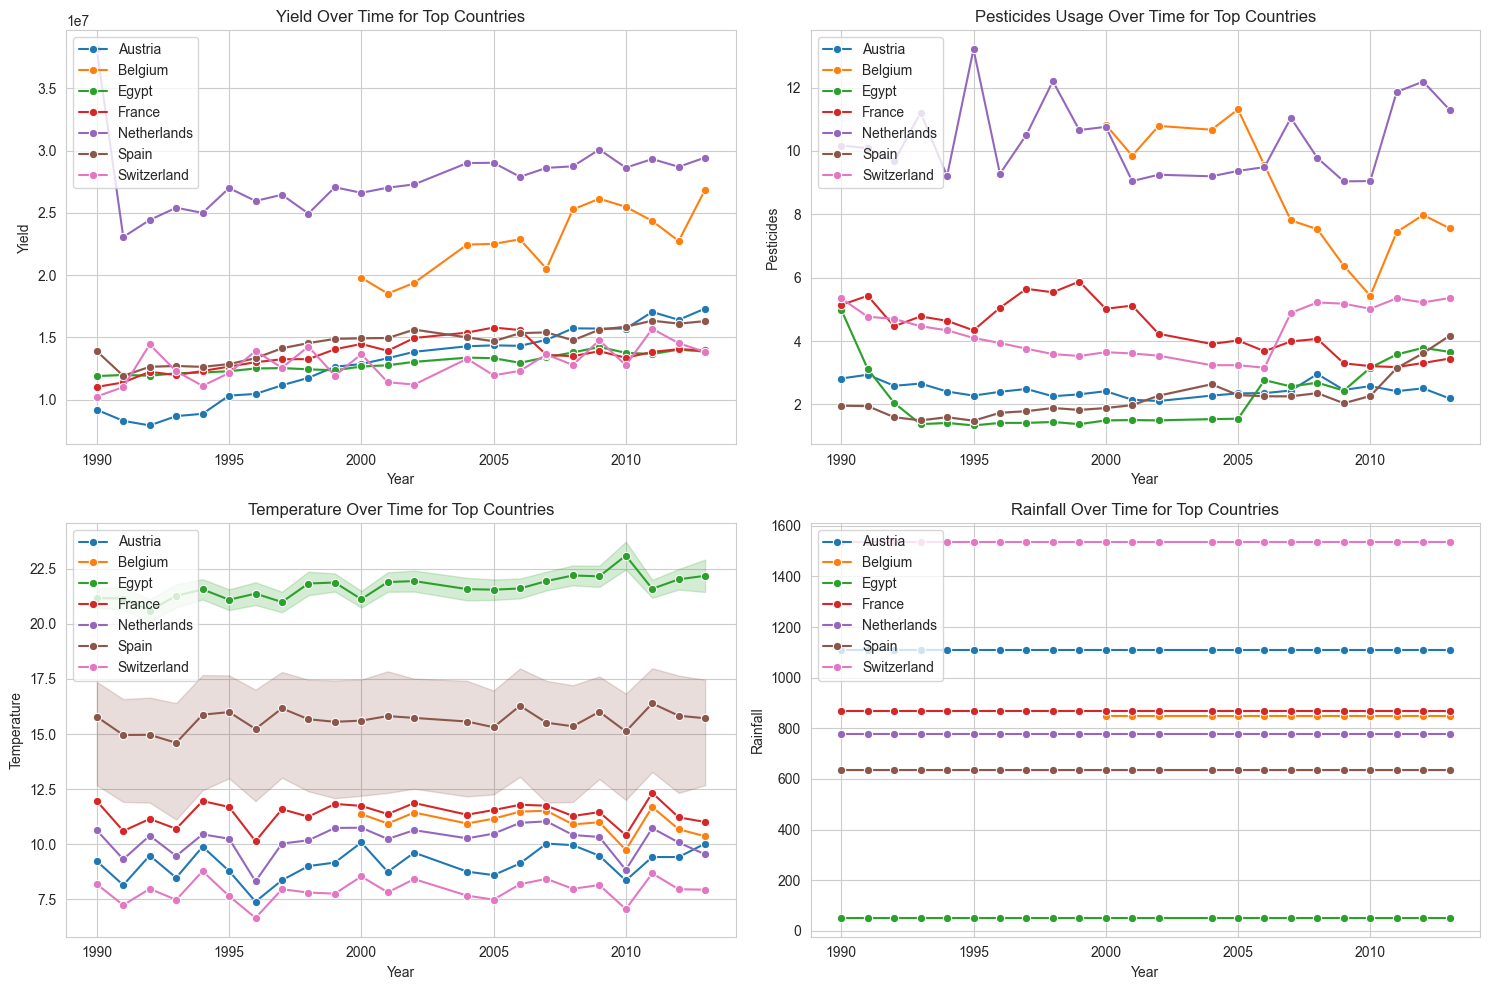

In [6]:
# Analyze the top N countries based on average yield
top_countries = df.groupby('Country')['Yield'].mean().sort_values(ascending=False).head(7).index.tolist()
top_countries_df = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(15, 10))

# Yield over time
plt.subplot(2, 2, 1)
sns.lineplot(data=top_countries_df, x='Year', y='Yield', hue='Country', marker='o')
plt.title('Yield Over Time for Top Countries')
plt.legend(loc='upper left')

# Pesticides
plt.subplot(2, 2, 2)
sns.lineplot(data=top_countries_df, x='Year', y='Pesticides', hue='Country', marker='o')
plt.title('Pesticides Usage Over Time for Top Countries')
plt.legend(loc='upper left')

# Temperature
plt.subplot(2, 2, 3)
sns.lineplot(data=top_countries_df, x='Year', y='Temperature', hue='Country', marker='o')
plt.title('Temperature Over Time for Top Countries')
plt.legend(loc='upper left')

# Rainfall
plt.subplot(2, 2, 4)
sns.lineplot(data=top_countries_df, x='Year', y='Rainfall', hue='Country', marker='o')
plt.title('Rainfall Over Time for Top Countries')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

country_summary = top_countries_df.groupby('Country').agg({
    'Yield': 'mean',
    'Pesticides': 'mean',
    'Temperature': 'mean',
    'Rainfall': 'mean'
}).sort_values(by='Yield', ascending=False)

There seems to be a positive relationship between pesticide usage and yield. Countries that use more pesticides tend to have higher yields.
The temperature and rainfall patterns are relatively consistent across both segments, indicating that these factors might not be the primary drivers for the differences in yield.

# Segmenting the Data

Our data segmentation revealed key interactions among temperature, rainfall, and pesticide use and their impacts on crop yields. 

The "Low Temperature & Low Rainfall" segment yielded the highest average crop output, suggesting these crops thrive in cooler, drier conditions. In contrast, crops in the "High Temperature & High Rainfall" zone showed the lowest yields, indicating that excessive heat and rain might not be favorable for their growth. Interestingly, this cooler and drier segment also recorded the highest pesticide use, hinting at its potential role in boosting yields.

On the rainfall-pesticide interplay, the data showed that while high rainfall combined with pesticide use resulted in improved yields, regions with high rainfall but low pesticide use had lower yields. This suggests a synergistic effect of rainfall and pesticides in enhancing crop production.

In essence, understanding these interactions can guide better agricultural strategies. Particularly, regions with high rainfall but low pesticide use might offer insights into sustainable farming practices, minimizing pesticide dependence.

Furthermore, considering the environmental and health hazards linked to pesticide usage, areas experiencing high rainfall combined with heavy pesticide use is a concern. High rainfall can exacerbate the runoff of pesticides from fields, leading to contamination of the environment and groundwater sources[^4^]. This can also jeopardize human health and food security in developing countries[^5^]. Therefore, while high rainfall and pesticide use might boost crop yields short term, the potential long-term ecological and health damages might outweigh the benefits, underscoring the need for sustainable farming alternatives.

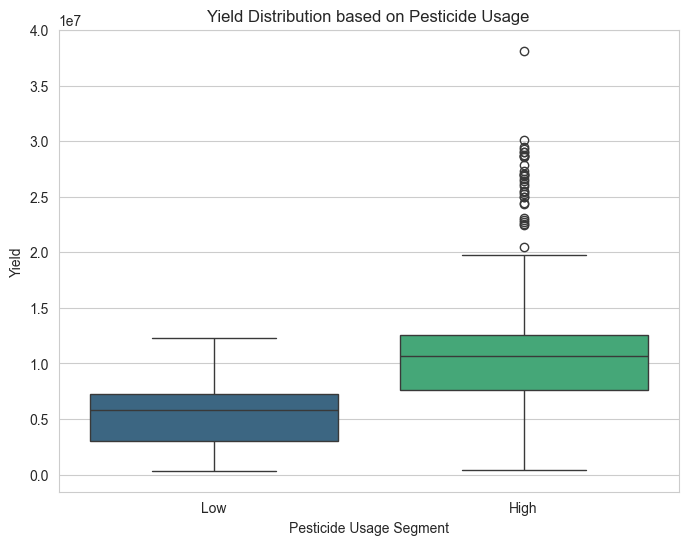

In [7]:
# impact of variables on yield based on statistical analysis

# Calculate the median pesticide usage to segment the data
median_pesticides = df['Pesticides'].median()

# Segment the data into high and low pesticide usage based on the median
df['Pesticide_Segment'] = df['Pesticides'].apply(lambda x: 'High' if x > median_pesticides else 'Low')

# Plotting the yield distribution for both segments
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Pesticide_Segment', y='Yield', palette='viridis')
plt.title('Yield Distribution based on Pesticide Usage')
plt.ylabel('Yield')
plt.xlabel('Pesticide Usage Segment')
plt.show()

# Summary statistics for the segments
segment_summary = df.groupby('Pesticide_Segment').agg({
    'Yield': ['mean', 'median', 'std'],
    'Temperature': ['mean', 'median', 'std'],
    'Rainfall': ['mean', 'median', 'std']
})

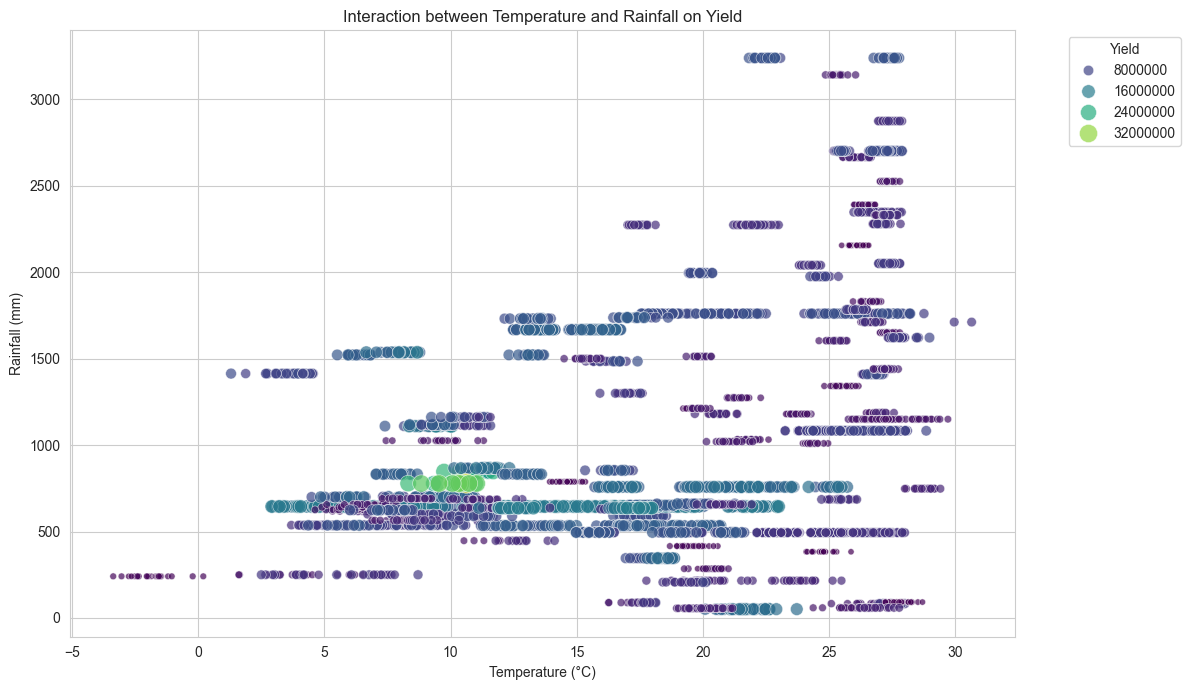

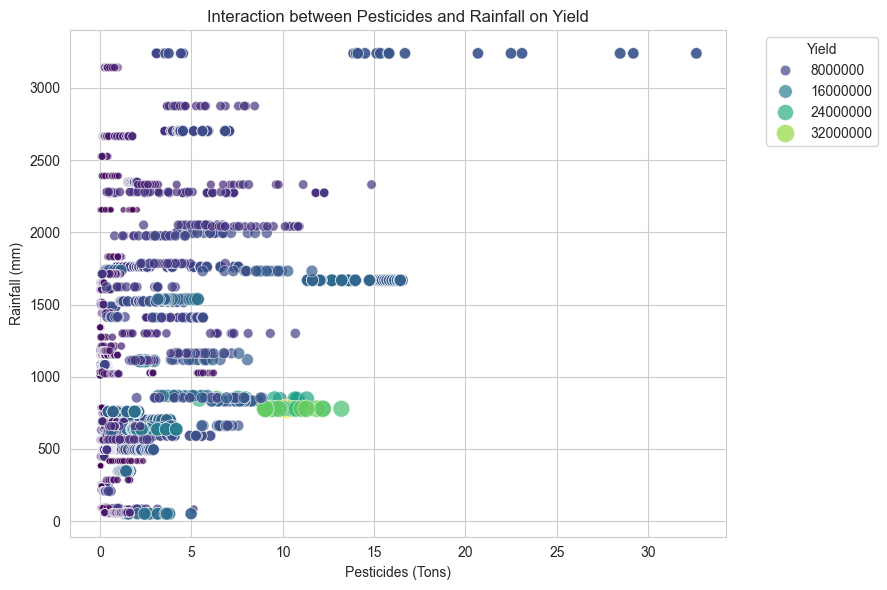

In [8]:
# Analyze the impact of temperature and rainfall on yield

# Interaction between Temperature and Rainfall on Yield
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Temperature', y='Rainfall', hue='Yield', size='Yield',
                sizes=(20, 200), palette='viridis', alpha=0.7)
plt.title('Interaction between Temperature and Rainfall on Yield')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Yield', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Interaction between Pesticides and Rainfall on Yield
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x='Pesticides', y='Rainfall', hue='Yield', size='Yield',
                sizes=(20, 200), palette='viridis', alpha=0.7)
plt.title('Interaction between Pesticides and Rainfall on Yield')
plt.xlabel('Pesticides (Tons)')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Yield', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Interactions

- The first plot suggests that there's a wide range of yields for similar temperature and rainfall conditions. This indicates that other factors, possibly like farming practices or soil quality, might play a significant role in determining yield.

- The second plot shows that higher pesticide usage doesn't necessarily correlate with higher yields, especially in regions with lower rainfall. This could imply that the effectiveness of pesticides might be influenced by rainfall or other environmental conditions

### Temperature & Rainfall Segmentation:

**High Temperature & High Rainfall**: This segment has the lowest yield mean and median. They also use a moderate amount of pesticides, indicating that the combination of high temperature and high rainfall may not be ideal for these crops.

**High Temperature & Low Rainfall**: The yield is better than in high rainfall conditions at the same temperature range, but still less than low temperature scenarios. The average pesticide usage is lower than the previous segment.

**Low Temperature & High Rainfall**: There's a significant improvement in yield in this segment, suggesting that cooler conditions with high rainfall are favorable. Pesticide usage is the second lowest among these four segments.

**Low Temperature & Low Rainfall**: This segment achieves the highest yield, combined with the highest pesticide use. This indicates that cooler and drier conditions are most favorable, but it might require a more intensive use of pesticides.
For the Pesticide Use & Rainfall Segmentation:

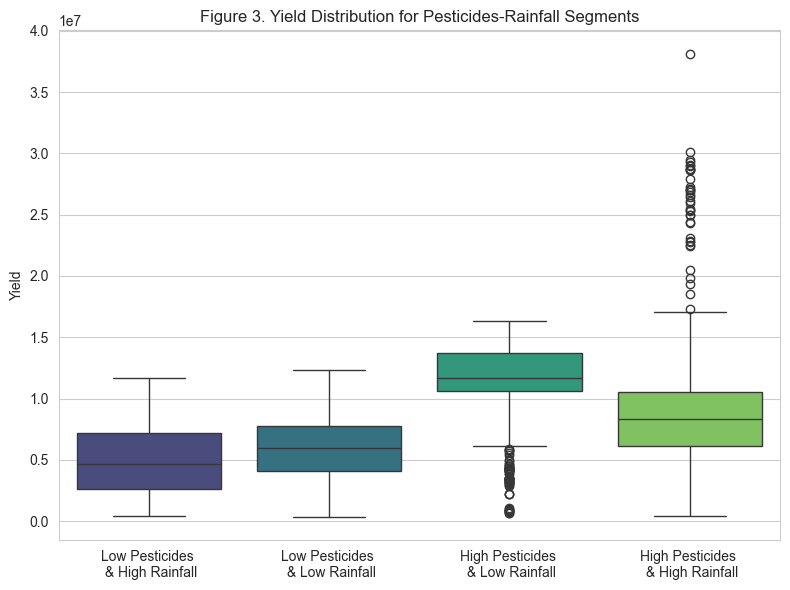

In [9]:
# Interaction between Pesticides and rainfall on Yield

median_pesticides = df['Pesticides'].median()
median_rainfall = df['Rainfall'].median()

conditions = [
    (df['Pesticides'] > median_pesticides) & (df['Rainfall'] > median_rainfall),
    (df['Pesticides'] <= median_pesticides) & (df['Rainfall'] > median_rainfall),
    (df['Pesticides'] > median_pesticides) & (df['Rainfall'] <= median_rainfall),
    (df['Pesticides'] <= median_pesticides) & (df['Rainfall'] <= median_rainfall)
]
choices = ['High Pesticides \n & High Rainfall', 'Low Pesticides \n & High Rainfall',
           'High Pesticides \n & Low Rainfall', 'Low Pesticides \n & Low Rainfall']
df['Segment'] = np.select(conditions, choices, default='Other')

fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.boxplot(data=df, x='Segment', y='Yield', palette='viridis', ax=ax)
plt.title('Figure 3. Yield Distribution for Pesticides-Rainfall Segments')
plt.ylabel('Yield')
plt.xlabel('')
plt.tight_layout()
plt.show()

segment_summary = df.groupby('Segment').agg({
    'Yield': ['mean', 'median', 'std'],
    'Temperature': ['mean', 'median', 'std']
})

### Pesticicde & Rainfall Segmentation:

**High Pesticides & High Rainfall**: The yield is moderate, even though there's high pesticide usage. The average temperature for this segment is also moderate.

**High Pesticides & Low Rainfall**: The yield increases in this segment despite the reduction in rainfall, possibly suggesting that higher pesticide application is more effective in drier conditions. The average temperature is lower.

**Low Pesticides & High Rainfall**: The yield drops significantly with reduced pesticide usage in high rainfall scenarios. The average temperature remains relatively consistent with the high pesticide & high rainfall segment.

**Low Pesticides & Low Rainfall**: There's a significant rise in yield compared to the high rainfall, low pesticide scenario. The cooler average temperature, combined with low rainfall, seems to benefit crops even with reduced pesticide usage.

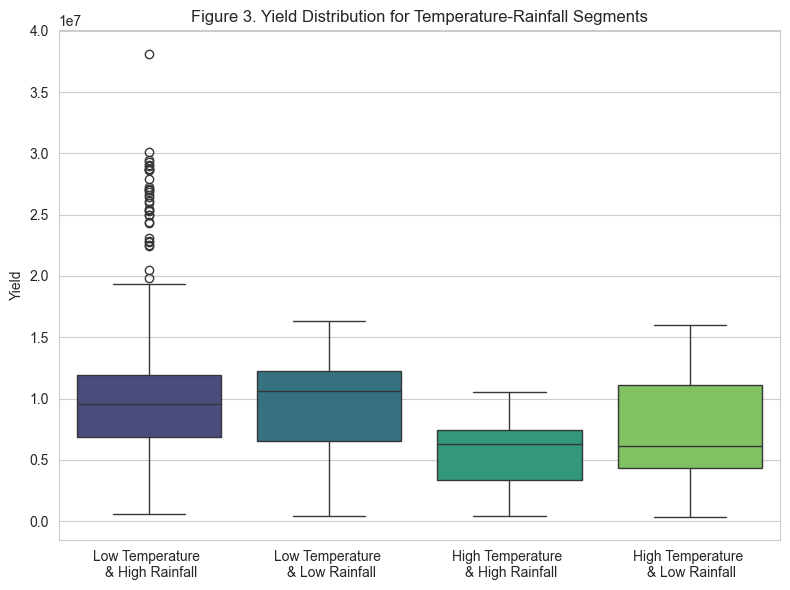

In [10]:
# Analysis of temperature and rainfall on yield

# Segmenting data based on median values of Temperature and Rainfall
median_temperature = df['Temperature'].median()
median_rainfall = df['Rainfall'].median()

conditions = [
    (df['Temperature'] > median_temperature) & (df['Rainfall'] > median_rainfall),
    (df['Temperature'] <= median_temperature) & (df['Rainfall'] > median_rainfall),
    (df['Temperature'] > median_temperature) & (df['Rainfall'] <= median_rainfall),
    (df['Temperature'] <= median_temperature) & (df['Rainfall'] <= median_rainfall)
]
choices = ['High Temperature \n & High Rainfall', 'Low Temperature \n & High Rainfall',
           'High Temperature \n & Low Rainfall', 'Low Temperature \n & Low Rainfall']
df['Segment'] = np.select(conditions, choices, default='Unsegmented')

# Filter out rows where 'Segment' is 'Unsegmented' before plotting
plot_df = df[df['Segment'] != 'Unsegmented']

# Plotting the yield distribution for each segment using plot_df
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
sns.boxplot(data=plot_df, x='Segment', y='Yield', palette='viridis', ax=ax)
plt.title('Figure 3. Yield Distribution for Temperature-Rainfall Segments')
plt.ylabel('Yield')
plt.xlabel('')
plt.tight_layout()
plt.show()

The previous two visualizations explorare insights into how temperature and rainfall interact to influence crop yield. It emphasizes the importance of considering both factors together when making farming decisions and planning for future agricultural practices. 

Cooler temperatures generally yield better crop output regardless of rainfall conditions. High pesticide usage is associated with higher crop yield, but it's most effective in low rainfall conditions. Given the environmental and health concerns associated with high pesticide usage, the data suggests that targeting cooler, low rainfall conditions might lead to more sustainable farming conditions; however, this may not be feasible in the context of Countries for obvious reasons. 

### Summary of Answer to Question 1

In light of these observations, it would be advantageous to identify the successful countries within the "Low Pesticides & High Rainfall" segment. These are possibly the regions that have enhanced crop yield without resorting to pesticide dependence. Identifying and learning from these regions can provide valuable insights and lessons that may be applicable to toerh regions and encourage sustainable and efficient farming practices. With this understanding, we can now further refine our focus to identify such standout regions in the subsequent section of our report.

# Question 2

## Identify Improving Trends

The following aims to identify countries that consistently reduce their pesticide usage while simultaneously maintaining or increasing their crop yields. To achieve this, the data was grouped by country, and for each, two linear regression models are fitted: one for the trend of crop yield and another for the trend of pesticide use. The slope of these regression lines serves as an indicator of the trend. Specifically, a positive slope in the yield model means a positive and desirable trend, while a negative slope in the pesticide model indicates a decreasing trend in pesticide usage, also desirable.

After determining the trends for each country, we filtered the countries that exhibit a negative slope for pesticide usage (consistent reduction) and a non-negative slope for yield (stable or increasing yields) are shortlisted. The final output provides a list of these countries, highlighting them for further analysis. 

In [11]:
df = pd.read_csv('merged.csv')

In [12]:
median_temperature = df['Temperature'].median()
median_rainfall = df['Rainfall'].median()
median_pesticides = df['Pesticides'].median()
median_yield = df['Yield'].median()

high_pest_high_rain = df[(df['Pesticides'] > median_pesticides) & (df['Rainfall'] > median_rainfall)]
low_pest_high_rain = df[(df['Pesticides'] <= median_pesticides) & (df['Rainfall'] > median_rainfall)]
high_pest_low_rain = df[(df['Pesticides'] > median_pesticides) & (df['Rainfall'] <= median_rainfall)]
low_pest_low_rain = df[(df['Pesticides'] <= median_pesticides) & (df['Rainfall'] <= median_rainfall)]

low_pest_high_rain_countries = low_pest_high_rain['Country'].unique().tolist()

In [13]:
yield_slopes = {}
pesticide_slopes = {}

for country, group in df.groupby('Country'):

    # Linear regression for yield
    X_year = group['Year'].values.reshape(-1, 1)
    y_yield = group['Yield'].values
    reg_yield = LinearRegression().fit(X_year, y_yield)
    yield_slopes[country] = reg_yield.coef_[0]
    
    # Linear regression for pesticide
    y_pesticide = group['Pesticides'].values
    reg_pesticide = LinearRegression().fit(X_year, y_pesticide)
    pesticide_slopes[country] = reg_pesticide.coef_[0]

# Filter out +trend pesticides and -trend yield
consistent_countries = [country for country in yield_slopes 
                        if yield_slopes[country] >= 0 and pesticide_slopes[country] < 0]

display((Markdown(f'**Consistent countries**: {consistent_countries} \n')))

intersection = list(set(low_pest_high_rain_countries) & set(consistent_countries))

display(
    (Markdown(f'**Intersection** of *"Low Pesticide High Rain"* and countries that have reduced pesticide use: \n {intersection}'))
    )

**Consistent countries**: ['Angola', 'Austria', 'Bahrain', 'Belgium', 'Bulgaria', 'Croatia', 'Denmark', 'El Salvador', 'France', 'Greece', 'India', 'Italy', 'Japan', 'Kazakhstan', 'Namibia', 'Norway', 'Romania', 'Sierra Leone', 'Sri Lanka'] 


**Intersection** of *"Low Pesticide High Rain"* and countries that have reduced pesticide use: 
 ['Norway', 'Sierra Leone', 'Sri Lanka', 'Angola', 'India']

<Figure size 1000x500 with 0 Axes>

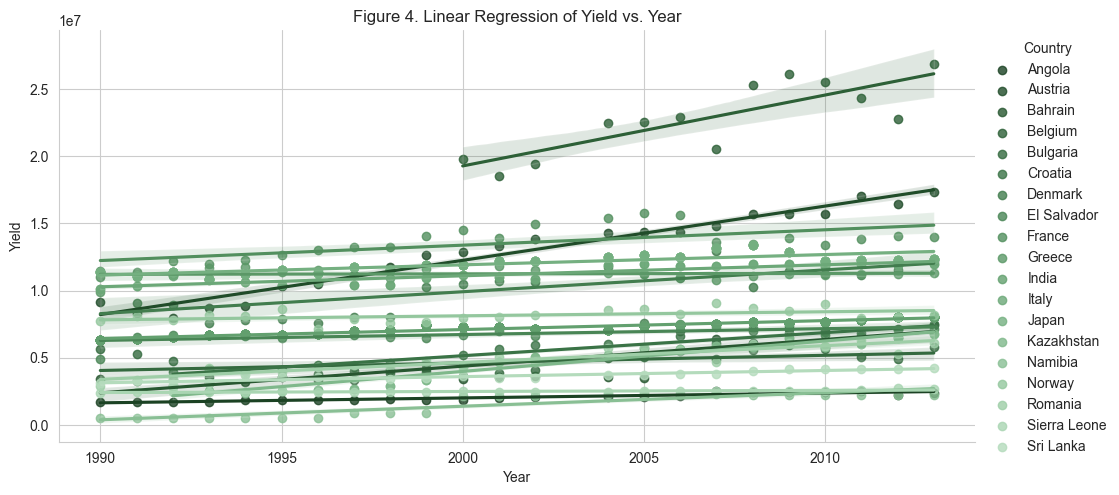

<Figure size 1000x500 with 0 Axes>

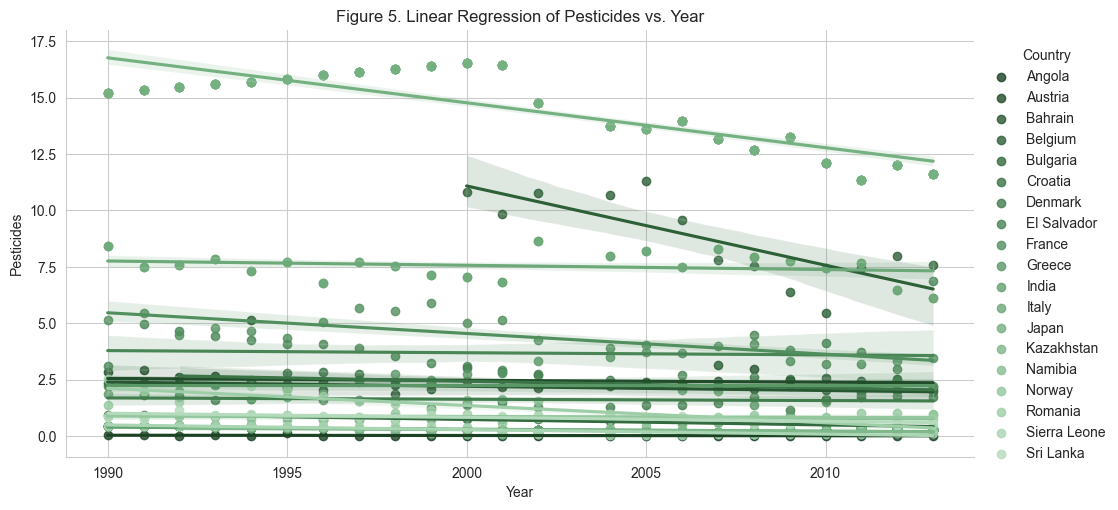

In [14]:
filtered_df = df[df['Country'].isin(consistent_countries)]
palette = sns.cubehelix_palette(len(consistent_countries), start=2, rot=0, dark=0.2, light=0.8, reverse=True)

# Yield vs. Year regression plots with green shades and transparent background
plt.figure(figsize=(10, 5))
ax1 = sns.lmplot(data=filtered_df, x="Year", y="Yield", hue="Country", palette=palette, height=5, aspect=2)
plt.title("Figure 4. Linear Regression of Yield vs. Year")
ax1.fig.patch.set_alpha(0)
for ax in ax1.axes.flat:
    ax.set_facecolor('none')
plt.show()

# Pesticides vs. Year regression plots with green shades and transparent background
plt.figure(figsize=(10, 5))
ax2 = sns.lmplot(data=filtered_df, x="Year", y="Pesticides", hue="Country", palette=palette, height=5, aspect=2)
plt.title("Figure 5. Linear Regression of Pesticides vs. Year")
ax2.fig.patch.set_alpha(0)
for ax in ax2.axes.flat:
    ax.set_facecolor('none')
plt.show()

### Alternative Approach

An alternative approach to identifying countries practicing sustainable agriculture involves analyzing the differences in yield and pesticide use between the first and last years recorded in the dataset. The provided code achieves this by grouping the data by country and then extracting the values of 'Yield' and 'Pesticides' from the first and last years for each country. These starting and ending values are then used to calculate the difference in yield and pesticide use over the years.

This methodology offers a more direct comparison by focusing solely on the net change over the entire period, rather than analyzing year-by-year trends. It simplifies the evaluation process and can be more computationally efficient. However, one potential downside is that it may overlook nuanced trends occurring within the period. For instance, a country might have initially increased pesticide use but then reduced it in later years, leading to a net decrease. Such internal variations wouldn't be captured by just comparing the start and end values. Conversely, the initial approach of linear regression captures the overall trend, providing a more detailed view of changes over time, albeit at the cost of computational complexity.

In [15]:
start_end_values = df.groupby('Country').agg({
    'Year': ['first', 'last'],
    'Yield': ['first', 'last'],
    'Pesticides': ['first', 'last']
})

start_end_values['Yield_diff'] = start_end_values['Yield']['last'] - start_end_values['Yield']['first']
start_end_values['Pesticides_diff'] = start_end_values['Pesticides']['last'] - start_end_values['Pesticides']['first']

countries_with_reduced_pesticide_use = start_end_values[(start_end_values['Yield_diff'] > 0) & 
                                            (start_end_values['Pesticides_diff'] <= 0)].reset_index()

countries_with_reduced_pesticide_use = countries_with_reduced_pesticide_use['Country'].tolist()

countries_with_reduced_pesticide_use

# All on list
trend_df = df[df['Country'].isin(countries_with_reduced_pesticide_use)]

# Reduced list
focus_list = list(set(intersection) & set(countries_with_reduced_pesticide_use))
focus_df = df[df['Country'].isin(focus_list)]

focus = ', '.join(focus_list)

display(Markdown(f'**Results:** {focus}; which are the same results'))

**Results:** Norway, Sierra Leone, Sri Lanka, Angola, India; which are the same results

### Trend in Pesticids for our Focus List

Plotting the nations from our focus list we can see definite trends in reduction of pesticide use over time. Of these, Angola appears to have very minimal changes and we will exclude them from further analysis. 

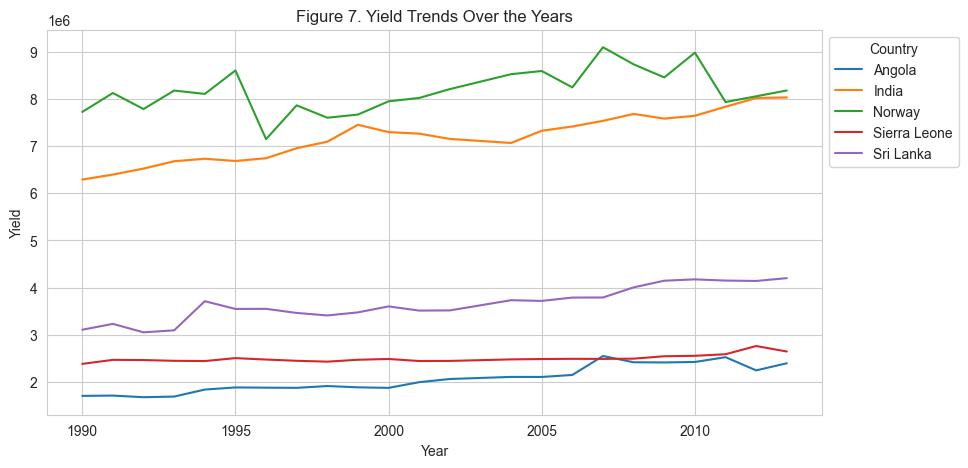

In [16]:
focus_df = df[df['Country'].isin(focus_list)]

sns.set_style("whitegrid")

# First Chart: Pesticides
# fig1, ax1 = plt.subplots(figsize=(10, 5))
# sns.lineplot(data=focus_df, x='Year', y='Pesticides', hue='Country', ax=ax1)
# ax1.set_title('Figure 6. Pesticide Use Trends Over the Years')
# ax1.set_xlabel('Year')
# ax1.set_ylabel('Pesticides')
# ax1.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
# ax1.set_facecolor('none')
# fig1.patch.set_alpha(0)
# plt.show()

# Second Chart: Yield for all countries on one plot
fig2, ax2 = plt.subplots(figsize=(10, 5))
sns.lineplot(data=focus_df, x='Year', y='Yield', hue='Country', ax=ax2)
ax2.set_title('Figure 7. Yield Trends Over the Years')
ax2.set_xlabel('Year')
ax2.set_ylabel('Yield')
ax2.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_facecolor('none')
fig2.patch.set_alpha(0)
plt.show()

In [17]:
# Exclude Angola as magnitude of data is low
focus_df = focus_df[focus_df['Country'] != 'Angola']

### Check Temperature Data

As a confirmation, we check the temperature trends for these countries and note that there does not appear to be a significant trend in any of these countries on our focus list. 

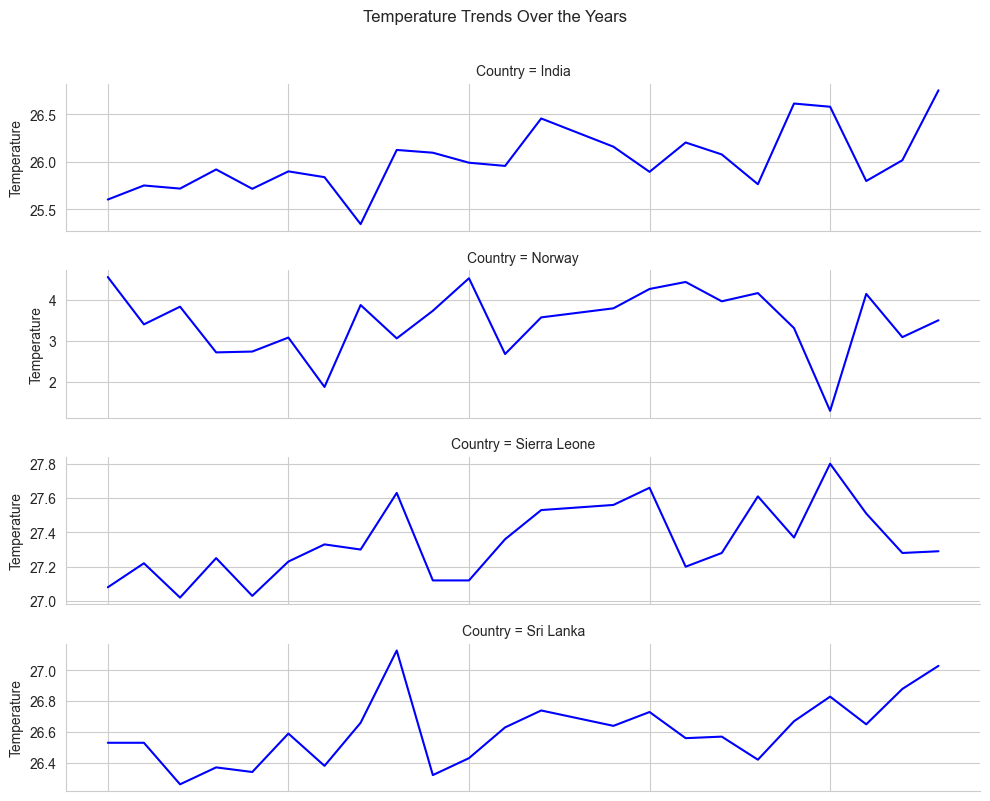

In [18]:
g = sns.FacetGrid(focus_df, row="Country", height=2, aspect=5, sharey=False)
g.map(sns.lineplot, "Year", "Temperature", color='blue', ci=None, estimator='mean')
g.fig.suptitle('Temperature Trends Over the Years', y=1.05)
g.set_axis_labels("", "Temperature")
g.set(xticklabels=[])

for ax in g.axes.flat:
    ax.set_facecolor('none')
g.fig.patch.set_alpha(0)
plt.show()

## Further Analysis of dountries who have improved yields without a significant change in pesticide use

We evaluated the mean yield and pesticides for the reduced list of countries and plotted them on a scatter plot, we can see that there is a variety of countries represented from around the world and there is a lot of variability in the magnitude of their means for each of the variables. We will continue to narrow this list to get our candidate countries. 

In [19]:
grouped_df = trend_df.groupby(['Country'])[['Yield', 'Pesticides']].mean().reset_index()
grouped_df

,Country,Yield,Pesticides
0,Angola,2.062319e+06,0.017391
1,Austria,1.282311e+07,2.452174
2,Bahrain,4.657537e+06,2.173043
3,Belgium,2.283586e+07,8.702308
4,Bulgaria,4.696600e+06,0.693478
5,Denmark,1.014121e+07,1.617391
6,Egypt,1.291562e+07,2.270870
7,France,1.353690e+07,4.409130
8,Hungary,7.091508e+06,1.731304
9,India,7.189841e+06,0.285652


In [20]:
# Altair chart as has better aesthetics

scatter_chart_yield_vs_pesticide = alt.Chart(grouped_df).mark_circle(size=100).encode(
    x='Pesticides:Q',
    y='Yield:Q',
    color='Country:N',
    tooltip=['Country', 'Pesticides', 'Yield']
).properties(
    title='Yield vs. Pesticide Use',
    width=600,
    height=400,
    background='transparent'
)

scatter_chart_yield_vs_pesticide

alt.Chart(...)

## Ranking the Candidate Countries

In our analysis, we aimed to rank countries based on two pivotal metrics: the percentage increase in crop yield and the percentage decrease in pesticide use over a given period. This dual-faceted approach ensures that the countries listed not only excel in agricultural productivity but also demonstrate sustainable farming practices.

Initially, we extracted the first and last recorded values for both yield and pesticide usage for each country. By calculating the percentage change between these two points, we were able to gauge the overall progression or regression of each country in these two arenas. For crop yield, a positive percentage indicates growth, whereas for pesticide use, a negative percentage signals a reduction. To formulate a comprehensive ranking score, we combined these percentages: the percentage increase in yield was added to the percentage decrease in pesticide use. This aggregate score served as a reflection of a country's commitment to both productivity and sustainability. Subsequently, we organized the countries in descending order based on this combined score, ensuring that nations at the top of our list demonstrated the most significant improvements in both metrics.

By employing this method, we have curated a list of countries that have successfully balanced the scales of agricultural output and environmental responsibility.

In [21]:
first_values = trend_df.groupby('Country').first()
last_values = trend_df.groupby('Country').last()

yield_perc_increase = ((last_values['Yield'] - first_values['Yield']) / first_values['Yield']) * 100
pesticide_perc_decrease = ((first_values['Pesticides'] - last_values['Pesticides']) / first_values['Pesticides']) * 100

ranking_score = yield_perc_increase + pesticide_perc_decrease

ranking_df = pd.DataFrame({
    'Country': yield_perc_increase.index,
    'Yield Percentage Increase': yield_perc_increase.values,
    'Pesticide Percentage Decrease': pesticide_perc_decrease.values,
    'Ranking Score': ranking_score.values
})

ranking_df = ranking_df.sort_values(by='Ranking Score', ascending=False).reset_index(drop=True)

print(ranking_df)

         Country  Yield Percentage Increase  Pesticide Percentage Decrease  Ranking Score
0        Romania                 110.220283                      69.841270     180.061553
1     Kazakhstan                 135.699430                      38.775510     174.474940
2        Bahrain                 116.098309                      12.820513     128.918822
3       Thailand                  61.780656                      59.340659     121.121315
4        Austria                  88.566285                      22.340426     110.906711
5         Angola                  40.400628                      50.000000      90.400628
6        Hungary                  59.956991                      28.215768      88.172759
7   Sierra Leone                  10.975799                      71.428571      82.404371
8       Zimbabwe                   4.773443                      67.368421      72.141864
9      Sri Lanka                  35.115039                      34.939759      70.054798
10      Bu

In [22]:
chart_width = 800

base_chart = alt.Chart(ranking_df, width=chart_width).mark_bar().encode(
    x=alt.X('Country:N', sort='-y', title='Country', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Ranking Score:Q', title='Ranking Score'),
    tooltip=['Country', 'Ranking Score', 'Pesticide Percentage Decrease', 'Yield Percentage Increase']
)

pesticide_chart = base_chart.encode(
    color=alt.Color('Pesticide Percentage Decrease:Q', scale=alt.Scale(scheme='yellowgreen'), title='% Decrease')
).properties(title="Ranking and Color by Pesticide % Decrease")

yield_chart = base_chart.encode(
    color=alt.Color('Yield Percentage Increase:Q', scale=alt.Scale(scheme='blues'), title='% Increase')
).properties(title="Ranking and Color by Yield % Increase")

combined_chart = alt.vconcat(pesticide_chart, yield_chart).resolve_scale(color='independent')

combined_chart

alt.VConcatChart(...)

In [23]:
trend_list = ', '.join(ranking_df['Country'].tolist())
trend_list

'Romania, Kazakhstan, Bahrain, Thailand, Austria, Angola, Hungary, Sierra Leone, Zimbabwe, Sri Lanka, Bulgaria, Sweden, India, Belgium, France, Libya, Italy, Egypt, Norway, Japan, Denmark'

Remove Angola as the magnitude of its data is small

In [24]:
focus_list.remove('Angola')

In [25]:
focus_ranking_df = ranking_df[ranking_df['Country'].isin(focus_list)]

In [26]:
base_chart = alt.Chart(focus_ranking_df).mark_bar().encode(
    x=alt.X('Country:N', sort='-y', title='Country', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Ranking Score:Q', title='Ranking Score'),
    tooltip=['Country', 'Ranking Score', 'Pesticide Percentage Decrease', 'Yield Percentage Increase']
)

pesticide_chart = base_chart.encode(
    color=alt.Color('Pesticide Percentage Decrease:Q', scale=alt.Scale(scheme='yellowgreen'), title='% Decrease')
).properties(title="Ranking and Color by Pesticide % Decrease", width=250)  # Increased width

yield_chart = base_chart.encode(
    color=alt.Color('Yield Percentage Increase:Q', scale=alt.Scale(scheme='blues'), title='% Increase')
).properties(title="Ranking and Color by Yield % Increase", width=250)  # Increased width

combined_chart = alt.hconcat(pesticide_chart, yield_chart).resolve_scale(color='independent')

combined_chart

alt.HConcatChart(...)

We can see the ranking of Sierra Leone, Sri Lanka, India and Norway are similar in ranking; as a suggestion for future study, I would recommend starting with these countries, 2 smaller countries and 2 larger, which is useful for comparisons. It's surprising that a large country like India. 

# Answer to Question 2:

Our analysis has presented some intriguing findings regarding the rankings of various countries in terms of sustainable farming practices. Notably, Sierra Leone, Sri Lanka, India, and Norway display similarities in their rankings. The inclusion of both Sierra Leone and Sri Lanka, which are relatively smaller nations, alongside larger countries like India and Norway, offers a diverse perspective. This diversity is crucial for a more comprehensive understanding, given the inherent differences in agricultural practices, economies, and challenges faced by countries of varying sizes.

It's particularly noteworthy to witness India's ranking in this context. Given its vast expanse, diverse agro-climatic conditions, and the significant role agriculture plays in its economy, the ranking provides food for thought. The presence of India in this list underscores the importance of analyzing large nations with extensive agricultural landscapes.

For future studies aimed at delving deeper into sustainable farming practices, I suggest commencing with the aforementioned four countries. Their varied sizes and challenges would provide a rich tapestry of insights, enabling useful comparisons and potentially revealing actionable solutions that can be implemented on a global scale.

Furthermore, our trend list offers an exhaustive roster of countries that are making strides in sustainable farming. This list, which includes nations from Romania to Denmark, provides a roadmap for researchers and policymakers. Each country on this list represents unique agricultural practices, challenges, and successes. Studying these nations will not only shed light on the diverse ways in which sustainability is approached in agriculture but also inspire innovative solutions that can be adapted and adopted worldwide.

### Our final list:

**Sierra Leone, Sri Lanka, India, Norway,** Romania, Kazakhstan, Bahrain, Thailand, Austria, Angola, Hungary, Zimbabwe, Bulgaria, Sweden, Belgium, France, Libya, Italy, Egypt, Japan, Denmark.

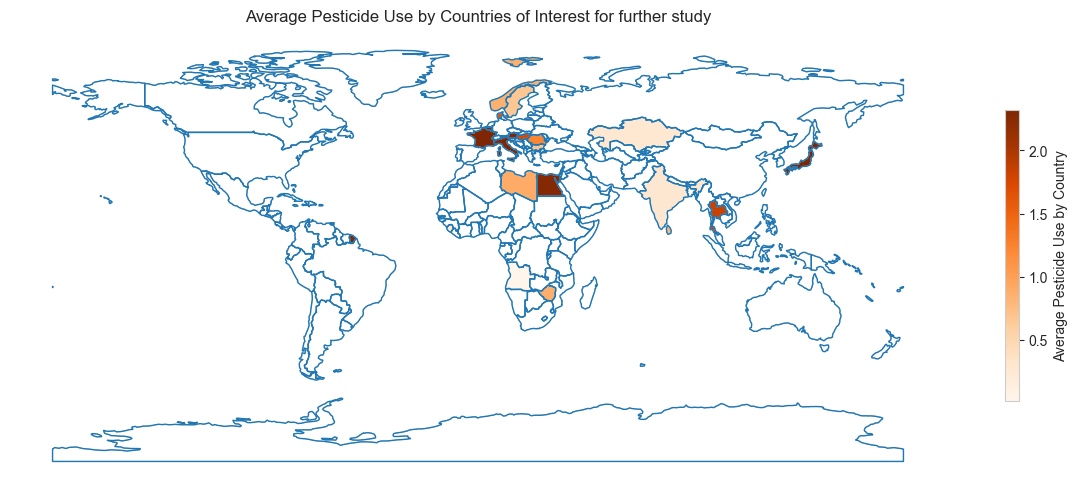

In [27]:
average_pesticides_by_country = trend_df.groupby('Country')['Pesticides'].mean().reset_index()

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.set_index('name').join(average_pesticides_by_country.set_index('Country'))
norm = Normalize(vmin=merged['Pesticides'].min(), vmax=merged['Pesticides'].quantile(0.75))

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)
merged.boundary.plot(ax=ax, linewidth=1)
merged.plot(column='Pesticides', ax=ax, legend=True,
            legend_kwds={'label': "Average Pesticide Use by Country", 'shrink': 0.3},
            cmap='Oranges', linewidth=0.8, edgecolor='0.8', missing_kwds={'color': 'white'},
            norm=norm)

ax.set_title("Average Pesticide Use by Countries of Interest for further study")
ax.set_axis_off()
plt.savefig("world.png", transparent=True)
plt.tight_layout()
plt.show()